In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
import requests
import urllib
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

!pip install fastapi

     |████████████████████████████████| 125 kB 5.6 MB/s 
     |████████████████████████████████| 51 kB 535 kB/s 
     |████████████████████████████████| 61 kB 263 kB/s 
     |████████████████████████████████| 10.1 MB 34.7 MB/s 
     |████████████████████████████████| 78 kB 6.6 MB/s 


In [ ]:
import requests 
import json 
import pandas as pd 
!pip install fsspec
from io import StringIO 

     |████████████████████████████████| 132 kB 5.3 MB/s 


In [ ]:
# headers = {'Authorization': '14613e000930494db55a1b588eba8a4e'}
# top_headlines_url = 'https://newsapi.org/v2/top-headlines'
# everything_news_url = 'https://newsapi.org/v2/everything'
# sources_url = 'https://newsapi.org/v2/sources'
# headlines_payload = {'category': 'business', 'country': 'us'}
# everything_payload = {'q': 'finance', 'language': 'en', 'sortBy': 'popularity'}
# sources_payload = {'category': 'general', 'language': 'en', 'country': 'us'}

# response = requests.get(url=top_headlines_url, headers=headers, params=headlines_payload)
# response = requests.get(url=everything_news_url, headers=headers, params=everything_payload)
# response = requests.get(url=everything_news_url, headers=headers, params=everything_payload)

# # pretty_json_output = json.dumps(response.json(), indent=4)
# # print(pretty_json_output)

# response_json_string = json.dumps(response.json())
# response_json_string = json.dumps(response.json())

# response_dict = json.loads(response_json_string)
# articles_list = response_dict['articles']
# df = pd.read_json(json.dumps(io.StringIO(articles_list)))
# df.to_csv('/Users/appleapple/Desktop/news.csv')


<Figure size 1224x864 with 0 Axes>

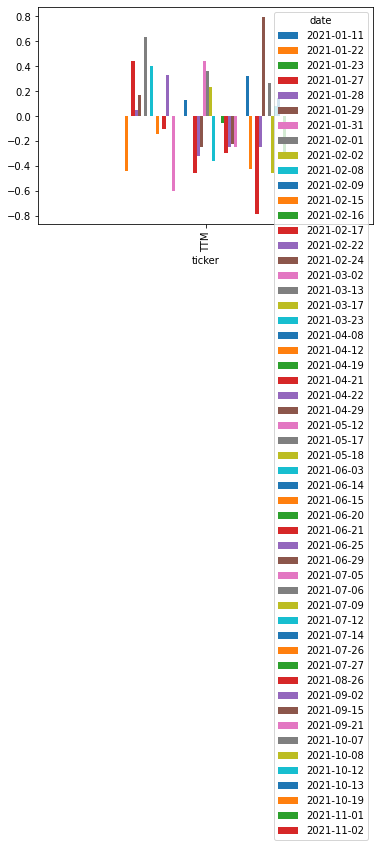

In [ ]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

finviz_url = 'https://finviz.com/quote.ashx?t='
# tickers = ['AMZN', 'GOOG', 'FB','TTM']
tickers = ['TTM']


news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

parsed_data = []

for ticker, news_table in news_tables.items():

    for row in news_table.findAll('tr'):

        title = row.a.text
        date_data = row.td.text.split(' ')

        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])

df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])

vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
df['date'] = pd.to_datetime(df.date).dt.date

fig = plt.figure(figsize=(17,12))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns")
mean_df.plot(kind='bar')
plt.show() 

In [ ]:
df['ticker'].unique()

array(['TTM'], dtype=object)

In [ ]:
# df = df[df['ticker'] == 'AMZN'] 
df = df[df['ticker'] == 'TTM'] 

In [ ]:
df.head(7)

,ticker,date,time,title,compound
0,TTM,2021-11-02,12:30AM,Tata Motors (TTM) Q2 2022 Earnings Call Transc...,0.0000
1,TTM,2021-11-01,08:00PM,Chip Dip and Carbon Footprint Bills Trap Jaguar,-0.3182
2,TTM,2021-11-01,09:09AM,Skoda to make quarter of a million fewer cars ...,-0.2500
3,TTM,2021-11-01,08:39AM,Skoda to make quarter of a million fewer cars ...,-0.2500
4,TTM,2021-11-01,08:13AM,Chip crisis halves Jaguar Land Rover sales,-0.6249
5,TTM,2021-11-01,06:50AM,India's Tata Motors says EV waiting period at ...,-0.2500
6,TTM,2021-10-19,12:02PM,33 Stocks Moving In Tuesday's Mid-Day Session,0.0000


In [ ]:
df['title'] = df['title'].str.lower()
df.head(2)

,ticker,date,time,title,compound
0,TTM,2021-11-02,12:30AM,tata motors (ttm) q2 2022 earnings call transc...,0.0000
1,TTM,2021-11-01,08:00PM,chip dip and carbon footprint bills trap jaguar,-0.3182


In [ ]:
# Count vectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier 
## IMPLEMENTING BAG OF WORDS MODEL
countvector= CountVectorizer(ngram_range=(2,2))
traindataset= countvector.fit_transform(df['title']) # CONVERTING ALL THE HEADLINES INTO VECTORS

# DATA CONVERTS INTO SPARSE MATRIX
traindataset[0] 

<1x663 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [ ]:
# !pip install --upgrade pandas
# !pip install --upgrade pandas-datareader

In [ ]:
# import pandas_datareader.data as web 
# import datetime as dt 

# start = dt.datetime(2020,1,1)
# end   = dt.datetime(2020,4,1)

# google = web.DataReader('GOOG','yahoo',start,end)
# google.head() 

In [ ]:
api_key = 'MXPE0FUWB351UOXC'
!pip install alpha_vantage
from alpha_vantage.timeseries import TimeSeries 
import time 

ts = TimeSeries(key = api_key ,output_format = 'pandas')
data , metadata = ts.get_daily_adjusted(symbol = 'TTM')   

     |████████████████████████████████| 1.1 MB 5.9 MB/s 
     |████████████████████████████████| 271 kB 51.0 MB/s 
     |████████████████████████████████| 160 kB 49.4 MB/s 
     |████████████████████████████████| 192 kB 44.8 MB/s 


In [ ]:
data.reset_index(level=0, inplace=True)

In [ ]:
data.head()  

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
0,2021-11-05,32.78,33.035,32.59,32.76,32.76,1074976.0,0.0,1.0
1,2021-11-04,32.71,32.770,32.39,32.48,32.48,991705.0,0.0,1.0
2,2021-11-03,31.73,32.920,31.72,32.88,32.88,1417489.0,0.0,1.0
3,2021-11-02,32.44,32.700,31.61,31.77,31.77,1946525.0,0.0,1.0
4,2021-11-01,32.76,33.940,32.71,33.53,33.53,2374650.0,0.0,1.0


In [ ]:
data.tail(2)

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
98,2021-06-18,22.52,22.52,22.17,22.18,22.18,2788538.0,0.0,1.0
99,2021-06-17,23.24,23.36,22.92,22.98,22.98,1500905.0,0.0,1.0


In [ ]:
df.tail(2)

,ticker,date,time,title,compound
98,TTM,2021-01-11,01:22PM,"tata motors stock soars, as electrified vehicl...",0.0
99,TTM,2021-01-11,11:12AM,tata motors stock is surging on india tesla ru...,0.0


In [ ]:
data.shape[0]

100

In [ ]:
print(data['date'].iloc[-1:] , df['date'].iloc[-1:])

99   2021-06-17
Name: date, dtype: datetime64[ns] 99    2021-01-11
Name: date, dtype: object


In [ ]:
# print(df.loc[0,'date'],data.loc[0,'date'])
# print(df.loc[df.shape[0],'date'],data.loc[data.shape[0],'date'])

In [ ]:
# s1 = pd.merge(df, data, how='inner', on=['date'])

Converting this dataframe to csv file and downloading it to use in the other ipynb file 

In [ ]:
data_amzn_recent = data.to_csv('data_amzn_recent.csv' , index = False)

In [ ]:
data['date'].value_counts().sum()

100

In [ ]:
data['date'].dtypes

dtype('<M8[ns]')

In [ ]:
data = data.sort_values(by = 'date')

In [ ]:
data.head(2)

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
99,2021-06-17,23.24,23.36,22.92,22.98,22.98,1500905.0,0.0,1.0
98,2021-06-18,22.52,22.52,22.17,22.18,22.18,2788538.0,0.0,1.0


In [ ]:
data.tail(2) 

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
1,2021-11-04,32.71,32.770,32.39,32.48,32.48,991705.0,0.0,1.0
0,2021-11-05,32.78,33.035,32.59,32.76,32.76,1074976.0,0.0,1.0


In [ ]:
data.drop('7. dividend amount',axis = 1 ,inplace = True)
data.drop('8. split coefficient' , axis = 1 ,inplace = True)

In [ ]:
data.head(2)

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume
99,2021-06-17,23.24,23.36,22.92,22.98,22.98,1500905.0
98,2021-06-18,22.52,22.52,22.17,22.18,22.18,2788538.0


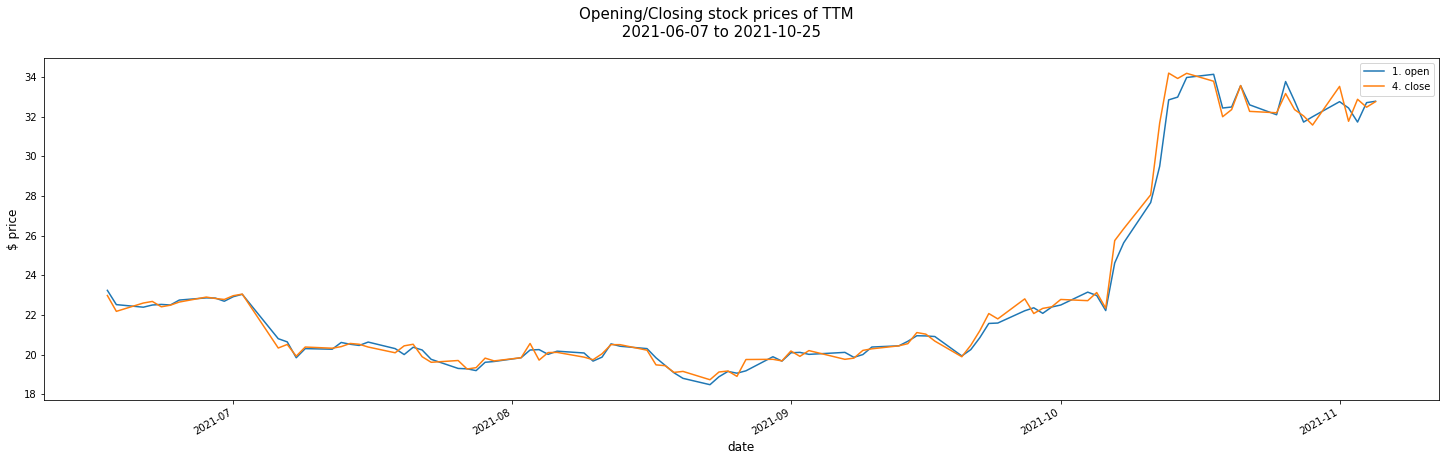

In [ ]:
# plt.figure(figsize=(17,17))
data.plot(x='date', y=['1. open', '4. close'] , figsize = (25,7) );
plt.suptitle('Opening/Closing stock prices of TTM \n 2021-06-07 to 2021-10-25', fontsize=15, color='black')
plt.xlabel("date",fontsize=12, color='black')
plt.ylabel("$ price", fontsize=12, color='black')
plt.show() 

In [ ]:
data['dif'] = data['1. open'] - data['4. close']
data.head(3) 

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,dif
99,2021-06-17,23.24,23.36,22.92,22.98,22.98,1500905.0,0.26
98,2021-06-18,22.52,22.52,22.17,22.18,22.18,2788538.0,0.34
97,2021-06-21,22.39,22.61,22.34,22.60,22.60,675941.0,-0.21


In [ ]:
count_neg = count_zero = count_pos = pos = neg =  0 
for i in data['dif']:
  if i == 0 :
    count_zero += 1 
  elif i < 0 :
    count_neg += 1 
    neg += i 
  else :
    count_pos += 1 
    pos +=  i

print(count_neg , count_zero , count_pos)
print(neg , pos )

55 3 42
-17.13999999999999 9.620000000000012


In [ ]:
data['dif'].mean() 

-0.07519999999999978

In [ ]:
data['Day'] = data['date'].dt.dayofweek
data['month'] = pd.DatetimeIndex(data['date']).month
data.head(3) 

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,dif,Day,month
99,2021-06-17,23.24,23.36,22.92,22.98,22.98,1500905.0,0.26,3,6
98,2021-06-18,22.52,22.52,22.17,22.18,22.18,2788538.0,0.34,4,6
97,2021-06-21,22.39,22.61,22.34,22.60,22.60,675941.0,-0.21,0,6


In [ ]:
data['month'].unique() 

array([ 6,  7,  8,  9, 10, 11])

In [ ]:
data.corr(method = 'pearson') 

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,dif,Day,month
1. open,1.000000,0.997713,0.999361,0.996543,0.996543,0.311021,-0.113787,0.021211,0.647765
2. high,0.997713,1.000000,0.998315,0.999547,0.999547,0.343206,-0.176707,0.017583,0.657102
3. low,0.999361,0.998315,1.000000,0.997902,0.997902,0.307943,-0.137584,0.026154,0.649901
4. close,0.996543,0.999547,0.997902,1.000000,1.000000,0.342014,-0.195927,0.021510,0.656671
5. adjusted close,0.996543,0.999547,0.997902,1.000000,1.000000,0.342014,-0.195927,0.021510,0.656671
6. volume,0.311021,0.343206,0.307943,0.342014,0.342014,1.000000,-0.418905,-0.120581,0.222131
dif,-0.113787,-0.176707,-0.137584,-0.195927,-0.195927,-0.418905,1.000000,-0.006867,-0.206986
Day,0.021211,0.017583,0.026154,0.021510,0.021510,-0.120581,-0.006867,1.000000,-0.002996
month,0.647765,0.657102,0.649901,0.656671,0.656671,0.222131,-0.206986,-0.002996,1.000000


In [ ]:
data.cov()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,dif,Day,month
1. open,2.352876e+01,2.419608e+01,2.314933e+01,2.375556e+01,2.375556e+01,1.984187e+06,-0.226804,0.144954,4.435822
2. high,2.419608e+01,2.499655e+01,2.383549e+01,2.455912e+01,2.455912e+01,2.256778e+06,-0.363041,0.123853,4.637992
3. low,2.314933e+01,2.383549e+01,2.280517e+01,2.341932e+01,2.341932e+01,1.934106e+06,-0.269989,0.175965,4.381478
4. close,2.375556e+01,2.455912e+01,2.341932e+01,2.415123e+01,2.415123e+01,2.210584e+06,-0.395663,0.148929,4.555899
5. adjusted close,2.375556e+01,2.455912e+01,2.341932e+01,2.415123e+01,2.415123e+01,2.210584e+06,-0.395663,0.148929,4.555899
6. volume,1.984187e+06,2.256778e+06,1.934106e+06,2.210584e+06,2.210584e+06,1.729766e+12,-226396.482893,-223433.757677,412439.869596
dif,-2.268045e-01,-3.630405e-01,-2.699887e-01,-3.956625e-01,-3.956625e-01,-2.263965e+05,0.168858,-0.003976,-0.120077
Day,1.449535e-01,1.238530e-01,1.759654e-01,1.489293e-01,1.489293e-01,-2.234338e+05,-0.003976,1.984949,-0.005960
month,4.435822e+00,4.637992e+00,4.381478e+00,4.555899e+00,4.555899e+00,4.124399e+05,-0.120077,-0.005960,1.993030


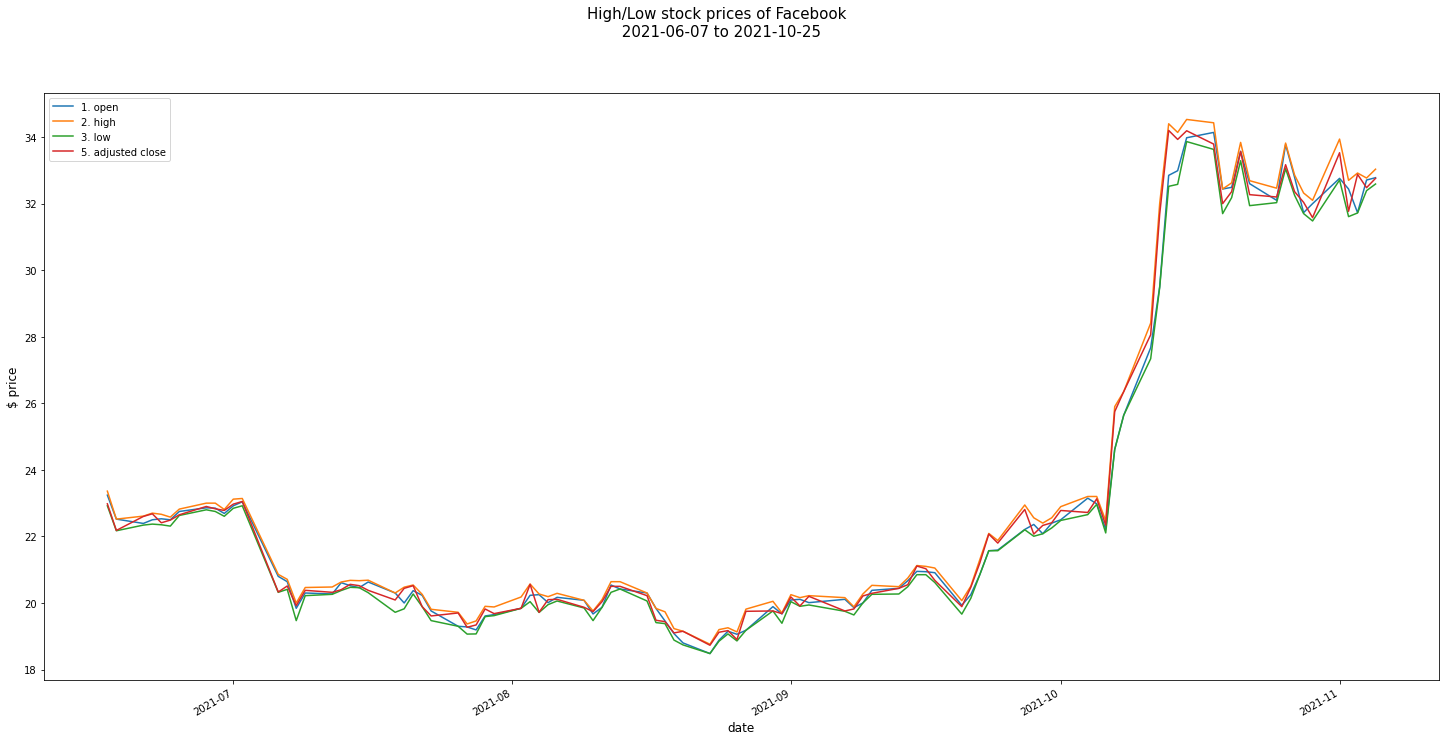

In [ ]:
# plt.figure(figsize=(17,17))
data.plot(x='date', y=['1. open', '2. high', '3. low' , '5. adjusted close'] , figsize = (25,12) );
plt.suptitle('High/Low stock prices of Facebook \n 2021-06-07 to 2021-10-25', fontsize=15, color='black')
plt.xlabel("date",fontsize=12, color='black')
plt.ylabel("$ price", fontsize=12, color='black')
plt.show() 

In [ ]:
# originally i here wanted to find out the relation between the stock price and the volume as i believe that if the volume is large then there is a greater chance of people taking it 
# what do u think we should predict in here ??
# we can have the close price as the end result or we can have the price of the next day as the result 
#  what if we managed to predict the opening price of the next day of this company ??
# will that shed any insight into the inner workings if the company or will it just be nothiung ?

In [ ]:
k = data['6. volume'] - data['6. volume'].mean() 
for i in k :
  if i < 0 :
    i *= -1 
print(k)
k.mean() 

99    -340581.43
98     947051.57
97   -1165545.43
96   -1144068.43
95   -1021200.43
         ...    
4      533163.57
3      105038.57
2     -423997.43
1     -849781.43
0     -766510.43
Name: 6. volume, Length: 100, dtype: float64


2.2584572434425353e-10

In [ ]:
data.head(3)

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,dif,Day,month
99,2021-06-17,23.24,23.36,22.92,22.98,22.98,1500905.0,0.26,3,6
98,2021-06-18,22.52,22.52,22.17,22.18,22.18,2788538.0,0.34,4,6
97,2021-06-21,22.39,22.61,22.34,22.60,22.60,675941.0,-0.21,0,6


In [ ]:
data.isna().sum()

date                 0
1. open              0
2. high              0
3. low               0
4. close             0
5. adjusted close    0
6. volume            0
dif                  0
Day                  0
month                0
dtype: int64

Text(0.5, 1.0, 'Correlations Among Features')

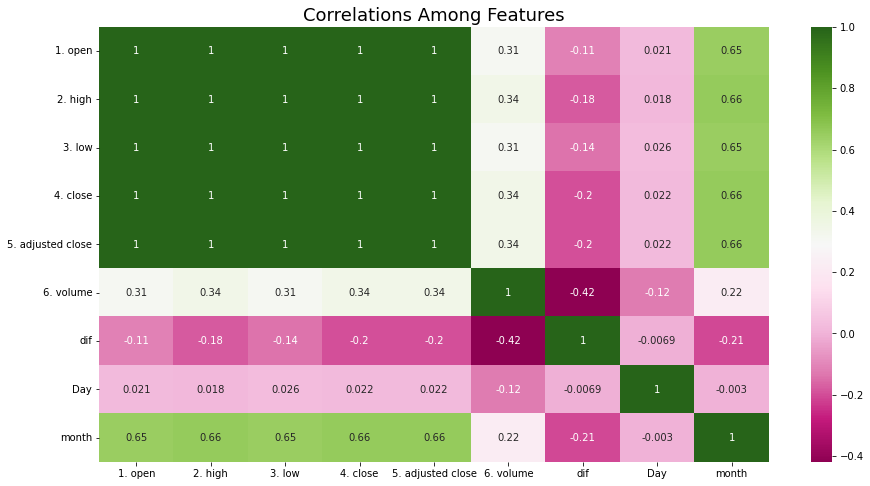

In [ ]:
# let us go by normalization now 
import seaborn as sns
plt.subplots(figsize = (15,8))
sns.heatmap(data.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 18) 

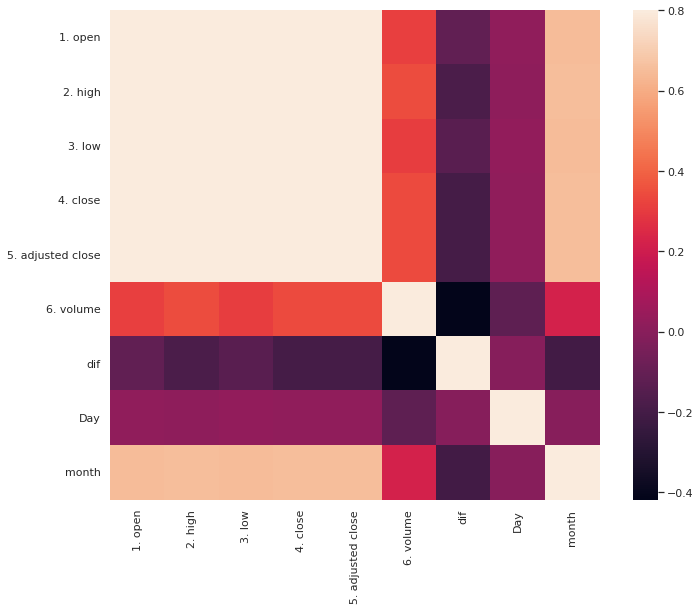

In [ ]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(data.corr(), vmax=.8, square=True)
?sns.heatmap 

In [ ]:
data.head(2)

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,dif,Day,month
99,2021-06-17,23.24,23.36,22.92,22.98,22.98,1500905.0,0.26,3,6
98,2021-06-18,22.52,22.52,22.17,22.18,22.18,2788538.0,0.34,4,6


In [ ]:
data.tail(1)

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,dif,Day,month
0,2021-11-05,32.78,33.035,32.59,32.76,32.76,1074976.0,0.02,4,11


In [ ]:
data.groupby('month').agg({'6. volume': ['mean', 'min', 'max', 'count']})  

6. volume                           
               mean       min        max count
month                                         
6      1.058719e+06  675941.0  2788538.0    10
7      2.089854e+06  663973.0  6127843.0    21
8      1.393666e+06  560951.0  3203150.0    22
9      1.514534e+06  620963.0  5179366.0    21
10     2.828729e+06  687844.0  7343301.0    21
11     1.561069e+06  991705.0  2374650.0     5

In [ ]:
data.groupby('month').agg({'1. open': ['mean', 'min', 'max', 'count']}) 

1. open                    
            mean    min    max count
month                               
6      22.683000  22.39  23.24    10
7      20.367619  19.19  23.04    21
8      19.675682  18.48  20.54    22
9      20.843333  19.86  22.40    21
10     29.796905  22.22  34.14    21
11     32.484000  31.73  32.78     5

In [ ]:
data.groupby('Day').agg({'4. close': ['mean', 'min', 'max', 'count']}) 

4. close                    
          mean    min    max count
Day                               
0    23.192778  18.73  33.79    18
1    22.956500  19.12  33.17    20
2    23.163500  19.17  34.20    20
3    23.361429  18.90  33.93    21
4    23.349524  19.15  34.19    21

In [ ]:
data.groupby('Day').agg({'6. volume': ['mean', 'min', 'max', 'count']}) 

6. volume                           
             mean       min        max count
Day                                         
0    1.746282e+06  622180.0  5179366.0    18
1    2.352635e+06  697418.0  6394214.0    20
2    1.933622e+06  716443.0  7343301.0    20
3    1.585312e+06  620963.0  4969507.0    21
4    1.604709e+06  560951.0  4529390.0    21

In [ ]:
data.groupby('Day').agg({'1. open': ['mean', 'min', 'max', 'count']}) 

1. open                     
          mean    min     max count
Day                                
0    23.117222  18.48  34.140    18
1    22.942500  18.88  33.775    20
2    23.029000  19.15  32.850    20
3    23.244286  19.06  33.570    21
4    23.314762  18.80  33.980    21

In [ ]:
data.groupby('Day').agg({'4. close': ['mean', 'min', 'max', 'count']}) 

4. close                    
          mean    min    max count
Day                               
0    23.192778  18.73  33.79    18
1    22.956500  19.12  33.17    20
2    23.163500  19.17  34.20    20
3    23.361429  18.90  33.93    21
4    23.349524  19.15  34.19    21

In [ ]:
data.head(2)

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,dif,Day,month
99,2021-06-17,23.24,23.36,22.92,22.98,22.98,1500905.0,0.26,3,6
98,2021-06-18,22.52,22.52,22.17,22.18,22.18,2788538.0,0.34,4,6


In [ ]:
data.drop(['dif','4. close'], axis = 1 , inplace = True )
data.head(3)

,date,1. open,2. high,3. low,5. adjusted close,6. volume,Day,month
99,2021-06-17,23.24,23.36,22.92,22.98,1500905.0,3,6
98,2021-06-18,22.52,22.52,22.17,22.18,2788538.0,4,6
97,2021-06-21,22.39,22.61,22.34,22.60,675941.0,0,6


In [ ]:
# ## lets create a function for outliers 
# def Outlier1(data):
#     threshold=3
#     for i in range(len(data.columns)):
#         X=data.iloc[:,i]
#         outlier=[]
        
#         mean_data=np.mean(X)
#         print(mean_data)
#         std_data=np.std(X)
#         print(std_data)
#         for j in X:
#             z_score=(j-mean_data)/std_data
#             if np.abs(z_score)>threshold:
#                 outlier.append(j)
#         for j in outlier:
#             data=data[data[data.columns[i]]!=j]
#     return data

In [ ]:
data.shape

(100, 8)

In [ ]:
# data = Outlier1(data)

In [ ]:
data.shape

(100, 8)

In [ ]:
data.head(1)

,date,1. open,2. high,3. low,5. adjusted close,6. volume,Day,month
99,2021-06-17,23.24,23.36,22.92,22.98,1500905.0,3,6


In [ ]:
data = data.set_index(pd.DatetimeIndex(data['date'].values)) 

In [ ]:
data.head(3)

,date,1. open,2. high,3. low,5. adjusted close,6. volume,Day,month
2021-06-17,2021-06-17,23.24,23.36,22.92,22.98,1500905.0,3,6
2021-06-18,2021-06-18,22.52,22.52,22.17,22.18,2788538.0,4,6
2021-06-21,2021-06-21,22.39,22.61,22.34,22.60,675941.0,0,6


In [ ]:
data.drop('date' , axis = 1, inplace= True )

In [ ]:
data.head(3)

,1. open,2. high,3. low,5. adjusted close,6. volume,Day,month
2021-06-17,23.24,23.36,22.92,22.98,1500905.0,3,6
2021-06-18,22.52,22.52,22.17,22.18,2788538.0,4,6
2021-06-21,22.39,22.61,22.34,22.60,675941.0,0,6


In [ ]:
data.describe().T 

,count,mean,std,min,25%,50%,75%,max
1. open,100.0,2.313280e+01,4.850645e+00,18.48,20.00750,20.655,2.299500e+01,34.140
2. high,100.0,2.340848e+01,4.999655e+00,18.76,20.17500,20.730,2.315500e+01,34.530
3. low,100.0,2.294178e+01,4.775476e+00,18.48,19.83625,20.465,2.286375e+01,33.865
5. adjusted close,100.0,2.320800e+01,4.914390e+00,18.73,19.90500,20.555,2.297250e+01,34.200
6. volume,100.0,1.841486e+06,1.315206e+06,560951.00,986557.75000,1400705.000,2.193424e+06,7343301.000
Day,100.0,2.070000e+00,1.408882e+00,0.00,1.00000,2.000,3.000000e+00,4.000
month,100.0,8.370000e+00,1.411747e+00,6.00,7.00000,8.000,1.000000e+01,11.000


We need to predict the next days closing price so we are going to shift the close price column by 1 up and predict it 

Also remember to remove the end NaN rows that are just arrived 

In [ ]:
data.tail(2)

,1. open,2. high,3. low,5. adjusted close,6. volume,Day,month
2021-11-04,32.71,32.770,32.39,32.48,991705.0,3,11
2021-11-05,32.78,33.035,32.59,32.76,1074976.0,4,11


In [ ]:
data['5. adjusted close'] = data['5. adjusted close'].shift(-2)
data.head(2)

,1. open,2. high,3. low,5. adjusted close,6. volume,Day,month
2021-06-17,23.24,23.36,22.92,22.60,1500905.0,3,6
2021-06-18,22.52,22.52,22.17,22.68,2788538.0,4,6


In [ ]:
data.tail(2)

,1. open,2. high,3. low,5. adjusted close,6. volume,Day,month
2021-11-04,32.71,32.770,32.39,NaN,991705.0,3,11
2021-11-05,32.78,33.035,32.59,NaN,1074976.0,4,11


In [ ]:
data = data.iloc[:-2 , :] 
print(data.shape) 

(98, 7)


In [ ]:
data.tail(2)

,1. open,2. high,3. low,5. adjusted close,6. volume,Day,month
2021-11-02,32.44,32.70,31.61,32.48,1946525.0,1,11
2021-11-03,31.73,32.92,31.72,32.76,1417489.0,2,11


In [ ]:
x_user_input = []

In [ ]:
y = data['5. adjusted close']
data.drop('5. adjusted close' , axis = 1 , inplace = True)

# print(x.shape,y.shape) 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# y.drop(index=y.index[-1], axis=0,inplace=True)

In [ ]:
x = data
print(x.shape,y.shape)

(98, 6) (98,)


In [ ]:
# WHYIS THE BLOODY SHAPE DOIFFERNET , SOO TIREDD 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler(feature_range=(0, 1))
x = s.fit_transform(x) 

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.3 , random_state = 1)
# x_train 

In [ ]:
y_train

2021-10-20    32.27
2021-09-30    22.72
2021-09-24    22.07
2021-08-11    20.50
2021-08-20    19.12
              ...  
2021-10-04    22.34
2021-06-30    23.05
2021-09-29    22.78
2021-07-06    19.92
2021-08-10    20.50
Name: 5. adjusted close, Length: 68, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print(model.score(x_test, y_test))

0.9172449450362888


Finding out the Mean Squared Error 

In [ ]:
y_pred_reg = model.predict(x_test)

mean_squared_error = np.mean((y_pred_reg - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error) 

Mean squared Error on test set :  2.0068759191137198


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Legend does not support 'u' instances

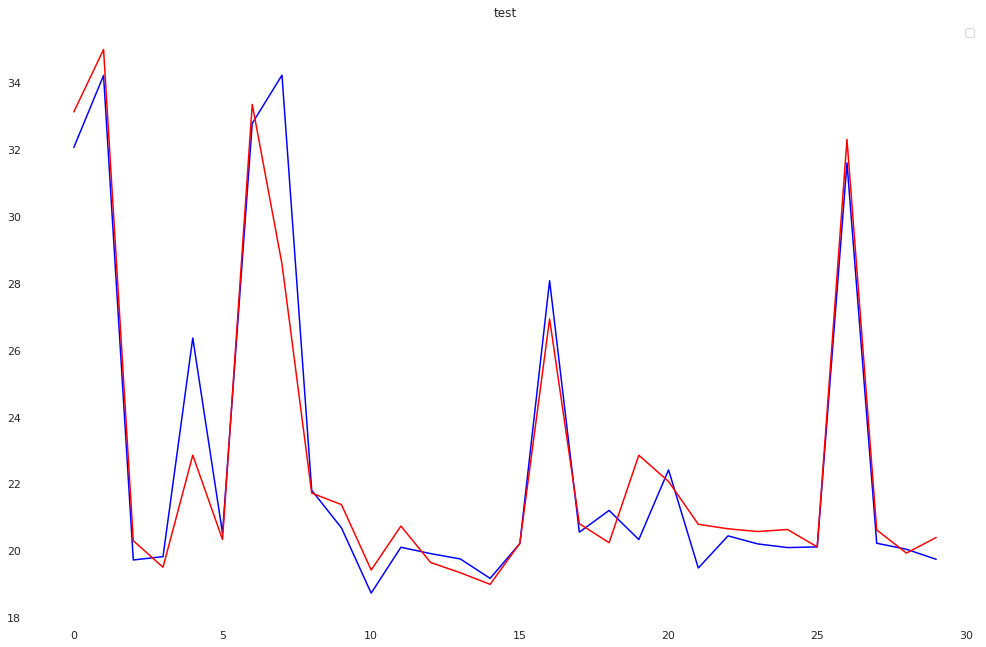

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.figure(figsize = (17,11))
    plt.plot(range(len(y_test)), y_test, color='blue', label = 'Actual')
    plt.plot(range(len(y_pred)), y_pred_reg, color='red' , label = 'Predicted' )
    plt.legend('Actual','Predicted')
    plt.title(regressorName)
    plt.show()
    return

plotGraph(y_test, y_pred_reg, "test")

Lets try to use some other models for prediction purposes 

In [ ]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import Ridge 

In [ ]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model1 = Ridge()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model1, x_train, y_train, cv=kfold, scoring=scoring)
print(results.mean()) 

-1.4588311779794618


In [ ]:
model1.fit(x_train , y_train)

y_pred_ridge = model1.predict(x_test)

mean_squared_error = np.mean((y_pred_ridge - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error) 

Mean squared Error on test set :  2.2146173178529973


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Legend does not support 'u' instances

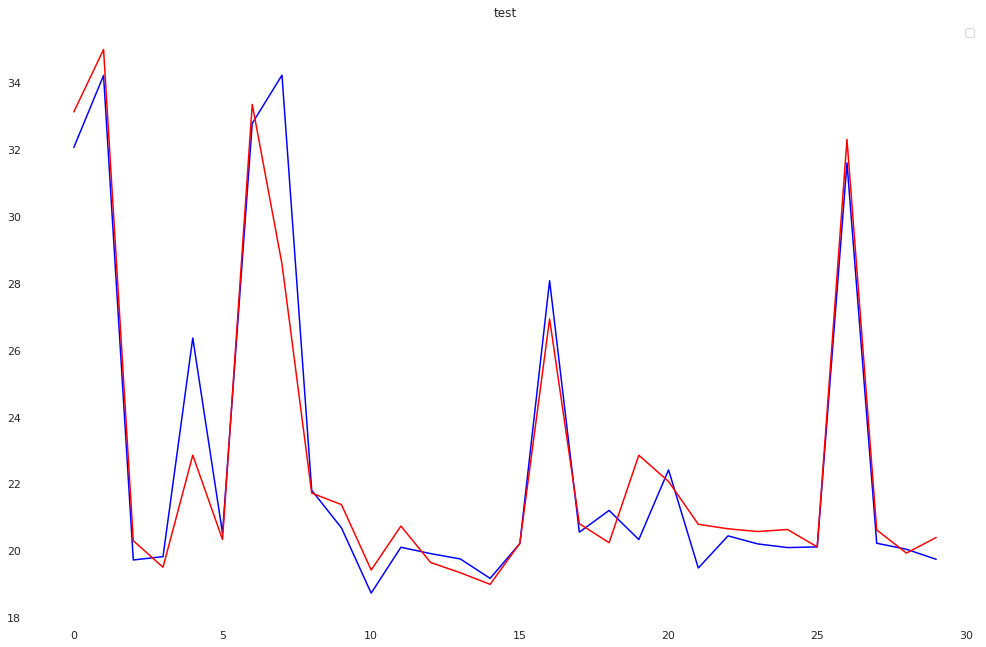

In [ ]:
plotGraph(y_test, y_pred_ridge , "test") 

In [ ]:
# KNN Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model2 = KNeighborsRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model2, x, y, cv=kfold, scoring=scoring)
print(results.mean())

model2.fit(x_train,y_train)

-1.6199819555555561


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Legend does not support 'u' instances

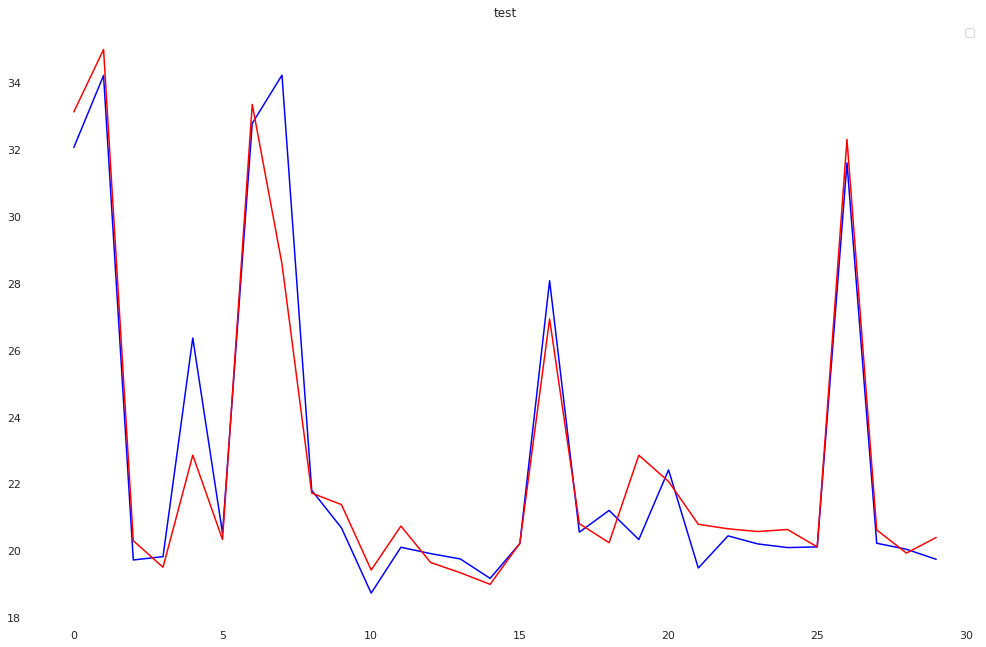

In [ ]:
# model2.fit(x_train,y_train)
y_pred_Kneigh_Reg = model2.predict(x_test)
plotGraph(y_test, y_pred_Kneigh_Reg , "test")  

-1.4130887777777785


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Legend does not support 'u' instances

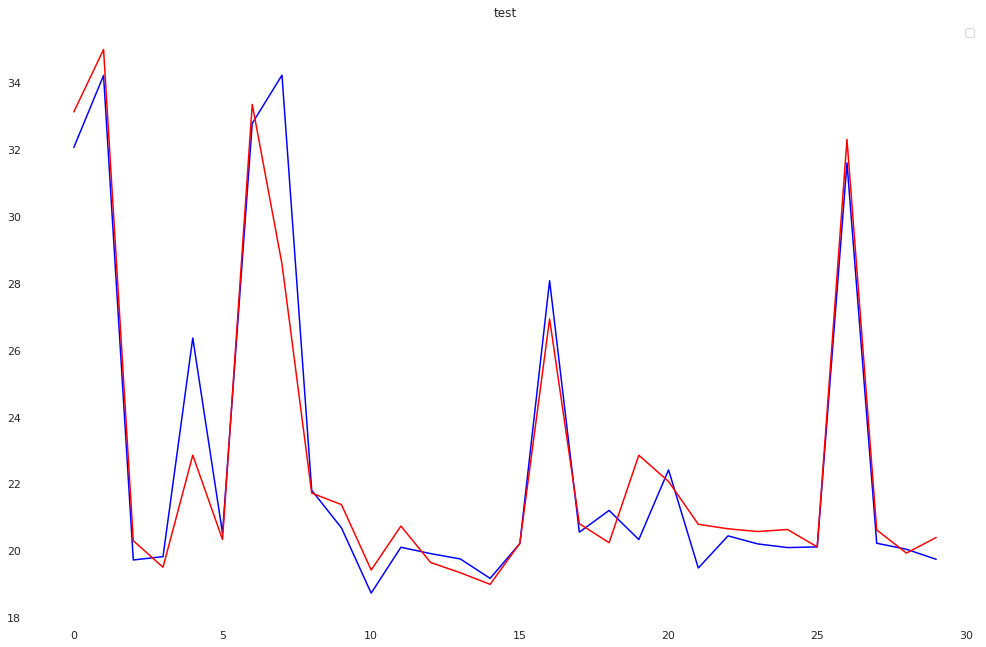

In [ ]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model3 = DecisionTreeRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model3, x, y, cv=kfold, scoring=scoring)
print(results.mean())

model3.fit(x_train,y_train)

y_pred_Desc_Tree = model3.predict(x_test)
plotGraph(y_test, y_pred_Desc_Tree , "test")  

-2.831348454419474


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Legend does not support 'u' instances

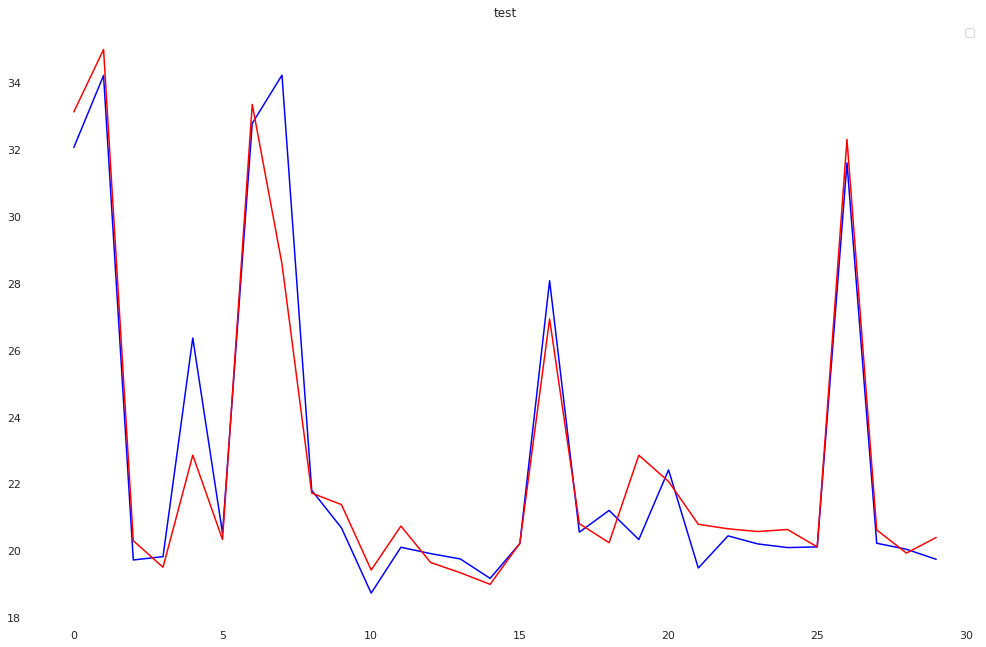

In [ ]:
# SVM Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model4 = SVR(gamma='auto')
scoring = 'neg_mean_squared_error'
results = cross_val_score(model4, x, y, cv=kfold, scoring=scoring)
print(results.mean())

model4.fit(x_train,y_train)

y_pred_svm = model3.predict(x_test)
plotGraph(y_test, y_pred_svm , "test") 

In [ ]:
# MACD parameter creation asn trying it 

In [ ]:
# def get_macd(price, slow, fast, smooth):
#     exp1 = price.ewm(span = fast, adjust = False).mean()
#     exp2 = price.ewm(span = slow, adjust = False).mean()
#     macd = pd.DataFrame(exp1 - exp2).rename(columns = {'close':'macd'})
#     signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'macd':'signal'})
#     hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns = {0:'hist'})
#     frames =  [macd, signal, hist]
#     df = pd.concat(frames, join = 'inner', axis = 1)
#     return df

# googl_macd = get_macd(, 26, 12, 9)
# googl_macd.tail() 